# Libraries

In [1]:
# default libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import math

In [2]:
# plotting configuration
sns.set(style = 'darkgrid',
        font_scale = 1.4,
        rc = {"lines.linewidth": 2,
          "figure.figsize": (12, 8)})

sns.set_palette('Set2')

In [3]:
from tools import get_exponential_bins, compute_quantile_hist_data, compute_interval_score
from data_gen import generate_raw_data,get_binned_data_cookie_bucket_level
from hyp_tests import percentile_bootstrap_ci_ratio_cookie_buckets
from hyp_tests import bc_a_bootstrap_ratio_cookie_buckets
from hyp_tests import jackknife_cookie_bucket_quantile_bucketed
from data_gen import generate_raw_data_lognormal
from data_gen import generate_raw_data_exponential
from data_gen import generate_data_mixture_exp_bucket_level

In [4]:
from data_gen import generate_data_single_corrupted_exp_bucket_level

# Simulations

In [9]:
bins_boundaries= get_exponential_bins(10,600000,100)
num_of_cookie_buckets = [10,20,30,40,50,60,70,80,90,100]
num_of_sims=1000

In [11]:
one_cor_varying_res_percentile_50=list()
one_cor_varying_res_bc_a_50=list()
one_cor_varying_res_jack_50=list()

one_cor_varying_length_percentile_50=list()
one_cor_varying_length_bc_a_50=list()
one_cor_varying_length_jack_50=list()

one_cor_varying_int_score_percentile_50=list()
one_cor_varying_int_score_bc_a_50=list()
one_cor_varying_int_score_jack_50=list()

one_cor_agreed_jack_bc_a_50 = list()
one_cor_agreed_jack_percentile_50 = list()
one_cor_agreed_bc_a_percentile_50 = list()
one_cor_agreed_all_three_50 = list()

for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    one_cor_varying_res_percentile_50+=[[]]
    one_cor_varying_res_bc_a_50+=[[]]
    one_cor_varying_res_jack_50+=[[]]

    one_cor_varying_length_percentile_50+=[[]]
    one_cor_varying_length_bc_a_50+=[[]]
    one_cor_varying_length_jack_50+=[[]]

    one_cor_varying_int_score_percentile_50+=[[]]
    one_cor_varying_int_score_bc_a_50+=[[]]
    one_cor_varying_int_score_jack_50+=[[]]

    one_cor_agreed_jack_bc_a_50 +=[[]]
    one_cor_agreed_jack_percentile_50+=[[]]
    one_cor_agreed_bc_a_percentile_50 +=[[]]
    one_cor_agreed_all_three_50 +=[[]]


In [12]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[300,600], cur_num_of_cookie_buckets, bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, paired=True, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, paired=True,return_interval=True)
        
        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.5, return_interval=True)

        # add coverage result
        one_cor_varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        one_cor_varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        one_cor_varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        one_cor_varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        one_cor_varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        one_cor_varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        one_cor_varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        one_cor_varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        one_cor_varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        one_cor_agreed_bc_a_percentile_50[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        one_cor_agreed_jack_bc_a_50[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        one_cor_agreed_jack_percentile_50[cur_ind]+=[res_jack[0]==res_percentile[0]]
        one_cor_agreed_all_three_50[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [13]:
aver_one_cor_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_percentile_50])
aver_one_cor_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_bc_a_50])
aver_one_cor_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_jack_50])

aver_one_cor_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_percentile_50])
aver_one_cor_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_bc_a_50])
aver_one_cor_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_jack_50])

aver_one_cor_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_percentile_50])
aver_one_cor_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_bc_a_50])
aver_one_cor_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_jack_50])

aver_one_cor_agreed_jack_bca_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_jack_bc_a_50])
aver_one_cor_agreed_jack_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_jack_percentile_50])
aver_one_cor_agreed_bca_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_bc_a_percentile_50])
aver_one_cor_agreed_all_three_50 = np.array([np.mean(cur_sample) for cur_sample in one_cor_agreed_all_three_50])

std_one_cor_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_percentile_50])
std_one_cor_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_bc_a_50])
std_one_cor_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_jack_50])

std_one_cor_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_percentile_50])
std_one_cor_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_bc_a_50])
std_one_cor_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_jack_50])

std_one_cor_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_percentile_50])
std_one_cor_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_bc_a_50])
std_one_cor_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_jack_50])

std_one_cor_agreed_jack_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_jack_bc_a_50])
std_one_cor_agreed_jack_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_jack_percentile_50])
std_one_cor_agreed_bca_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_bc_a_percentile_50])
std_one_cor_agreed_all_three_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_agreed_all_three_50])


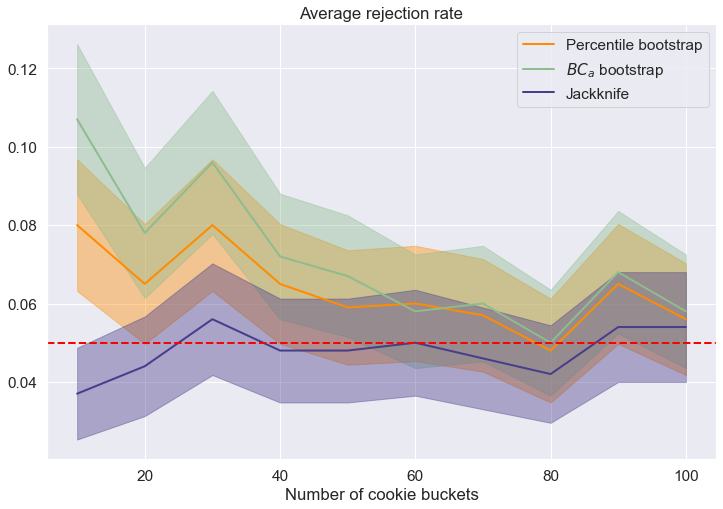

In [27]:
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_percentile_50 - 1.96 * std_one_cor_rej_rate_percentile_50,
    aver_one_cor_rej_rate_percentile_50 + 1.96*std_one_cor_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_bca_50 - 1.96 * std_one_cor_rej_rate_bca_50,
    aver_one_cor_rej_rate_bca_50 + 1.96*std_one_cor_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_jack_50 - 1.96 * std_one_cor_rej_rate_jack_50,
    aver_one_cor_rej_rate_jack_50 + 1.96*std_one_cor_rej_rate_jack_50, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()


plt.savefig('arr_paired.pdf',bbox_inches='tight')
plt.show()

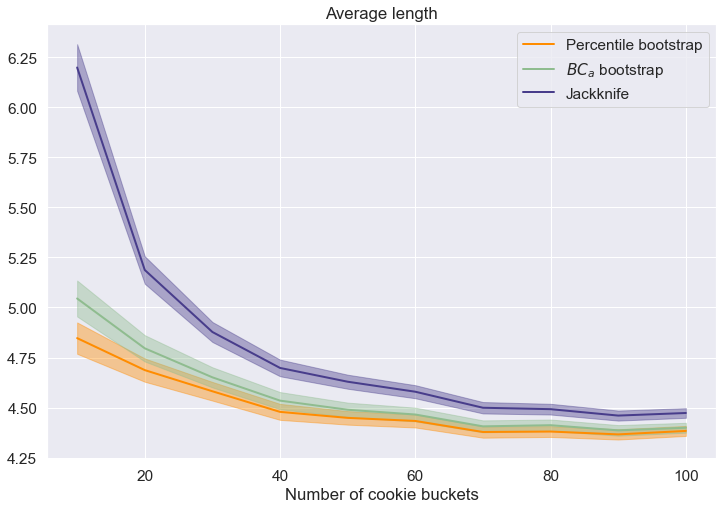

In [28]:
plt.plot(num_of_cookie_buckets, aver_one_cor_length_percentile_50, c='DarkOrange', label = 'Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_bca_50,  c='DarkSeaGreen', label = '$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_jack_50,c='darkslateblue', label = 'Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_percentile_50 - 1.96 * std_one_cor_length_percentile_50,
    aver_one_cor_length_percentile_50 + 1.96*std_one_cor_length_percentile_50, color = 'DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_bca_50 - 1.96 * std_one_cor_length_bca_50,
    aver_one_cor_length_bca_50 + 1.96*std_one_cor_length_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_50 - 1.96 * std_one_cor_length_jack_50,
    aver_one_cor_length_jack_50 + 1.96*std_one_cor_length_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()


plt.savefig('length_paired.pdf',bbox_inches='tight')
plt.show()

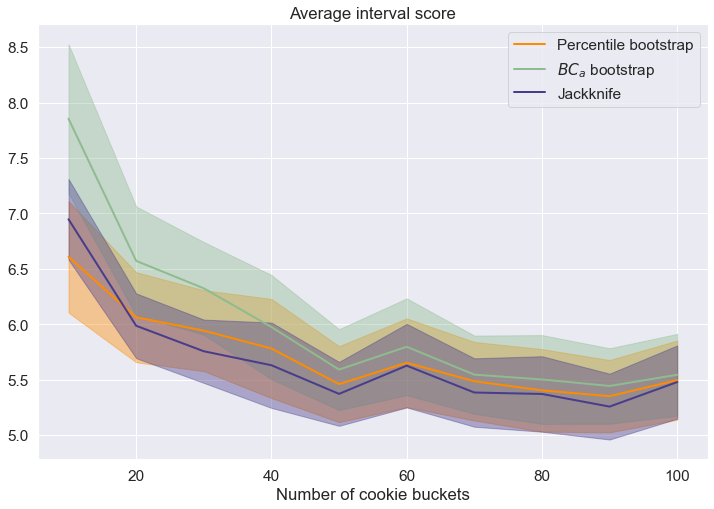

In [25]:
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_percentile_50 - 1.96 * std_one_cor_int_score_percentile_50,
    aver_one_cor_int_score_percentile_50 + 1.96*std_one_cor_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_bca_50 - 1.96 * std_one_cor_int_score_bca_50,
    aver_one_cor_int_score_bca_50 + 1.96*std_one_cor_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_jack_50 - 1.96 * std_one_cor_int_score_jack_50,
    aver_one_cor_int_score_jack_50 + 1.96*std_one_cor_int_score_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

# 95th percentile 

In [17]:
one_cor_varying_res_percentile_95=list()
one_cor_varying_res_bc_a_95=list()
one_cor_varying_res_jack_95=list()

one_cor_varying_length_percentile_95=list()
one_cor_varying_length_bc_a_95=list()
one_cor_varying_length_jack_95=list()

one_cor_varying_int_score_percentile_95=list()
one_cor_varying_int_score_bc_a_95=list()
one_cor_varying_int_score_jack_95=list()

In [18]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    one_cor_varying_res_percentile_95+=[[]]
    one_cor_varying_res_bc_a_95+=[[]]
    one_cor_varying_res_jack_95+=[[]]

    one_cor_varying_length_percentile_95+=[[]]
    one_cor_varying_length_bc_a_95+=[[]]
    one_cor_varying_length_jack_95+=[[]]

    one_cor_varying_int_score_percentile_95+=[[]]
    one_cor_varying_int_score_bc_a_95+=[[]]
    one_cor_varying_int_score_jack_95+=[[]]


In [19]:
for i in range(num_of_sims):

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):
        # generate bucketed data
        dataset_treat, dataset_control=generate_data_single_corrupted_exp_bucket_level([1000,1000],[600,300],cur_num_of_cookie_buckets,bins_boundaries)

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = pd.DataFrame(dataset_treat)
        bucketed_data_control = pd.DataFrame(dataset_control)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, paired=True, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, paired=True, return_interval=True)

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.95, return_interval=True)

        # add coverage result
        one_cor_varying_res_percentile_95[cur_ind]+=[res_percentile[0]]
        one_cor_varying_res_bc_a_95[cur_ind]+=[res_bc_a[0]]
        one_cor_varying_res_jack_95[cur_ind]+=[res_jack[0]]

        #add length
        one_cor_varying_length_percentile_95[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        one_cor_varying_length_bc_a_95[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        one_cor_varying_length_jack_95[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        one_cor_varying_int_score_percentile_95[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        one_cor_varying_int_score_bc_a_95[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        one_cor_varying_int_score_jack_95[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]



In [20]:
aver_one_cor_rej_rate_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_percentile_95])
aver_one_cor_rej_rate_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_bc_a_95])
aver_one_cor_rej_rate_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_res_jack_95])

aver_one_cor_length_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_percentile_95])
aver_one_cor_length_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_bc_a_95])
aver_one_cor_length_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_length_jack_95])

aver_one_cor_int_score_percentile_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_percentile_95])
aver_one_cor_int_score_bca_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_bc_a_95])
aver_one_cor_int_score_jack_95 = np.array([np.mean(cur_sample) for cur_sample in one_cor_varying_int_score_jack_95])


In [21]:
std_one_cor_rej_rate_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_percentile_95])
std_one_cor_rej_rate_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_bc_a_95])
std_one_cor_rej_rate_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_res_jack_95])

std_one_cor_length_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_percentile_95])
std_one_cor_length_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_bc_a_95])
std_one_cor_length_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_length_jack_95])

std_one_cor_int_score_percentile_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_percentile_95])
std_one_cor_int_score_bca_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_bc_a_95])
std_one_cor_int_score_jack_95 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in one_cor_varying_int_score_jack_95])


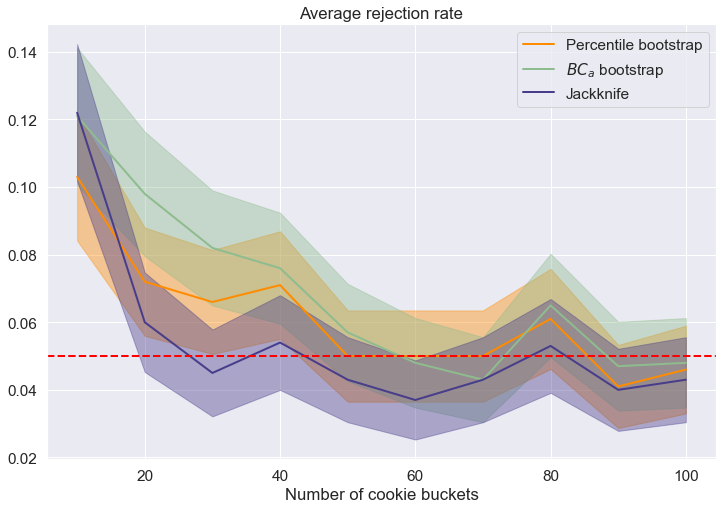

In [22]:
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_bca_95, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_rej_rate_jack_95, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_percentile_95 - 1.96 * std_one_cor_rej_rate_percentile_95,
    aver_one_cor_rej_rate_percentile_95 + 1.96*std_one_cor_rej_rate_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_bca_95 - 1.96 * std_one_cor_rej_rate_bca_95,
    aver_one_cor_rej_rate_bca_95 + 1.96*std_one_cor_rej_rate_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_rej_rate_jack_95 - 1.96 * std_one_cor_rej_rate_jack_95,
    aver_one_cor_rej_rate_jack_95 + 1.96*std_one_cor_rej_rate_jack_95, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

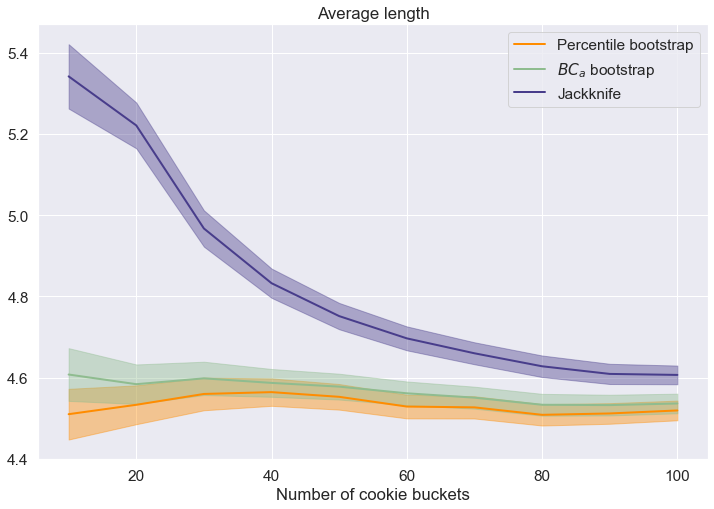

In [23]:
plt.plot(num_of_cookie_buckets, aver_one_cor_length_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_length_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_percentile_95 - 1.96 * std_one_cor_length_percentile_95,
    aver_one_cor_length_percentile_95 + 1.96*std_one_cor_length_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_bca_95 - 1.96 * std_one_cor_length_bca_95,
    aver_one_cor_length_bca_95 + 1.96*std_one_cor_length_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_length_jack_95 - 1.96 * std_one_cor_length_jack_95,
    aver_one_cor_length_jack_95 + 1.96*std_one_cor_length_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

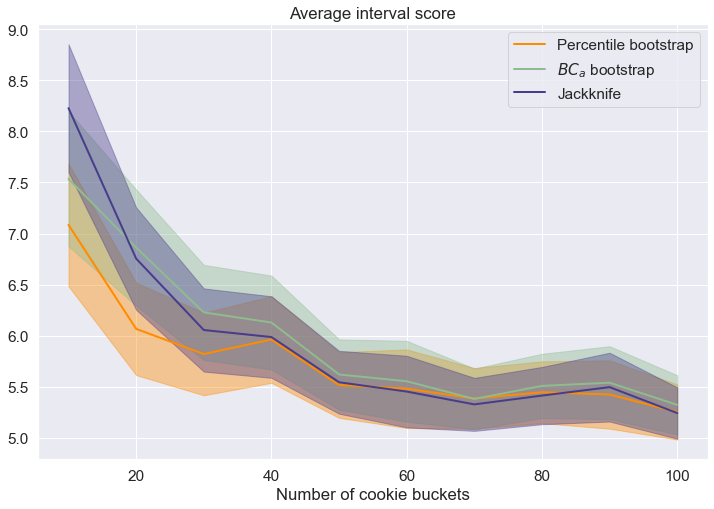

In [26]:
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_percentile_95, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_bca_95,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_one_cor_int_score_jack_95,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_percentile_95 - 1.96 * std_one_cor_int_score_percentile_95,
    aver_one_cor_int_score_percentile_95 + 1.96*std_one_cor_int_score_percentile_95, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_bca_95 - 1.96 * std_one_cor_int_score_bca_95,
    aver_one_cor_int_score_bca_95 + 1.96*std_one_cor_int_score_bca_95, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_one_cor_int_score_jack_95 - 1.96 * std_one_cor_int_score_jack_95,
    aver_one_cor_int_score_jack_95 + 1.96*std_one_cor_int_score_jack_95, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()